# Distribution and Trends of the World's Best Restaurants: Geographic and Time Analysis

This study presents a comprehensive analysis of data on the world's top restaurants, including geographic distribution, time trends and ranking dynamics. Using a variety of visualizations, we explore which countries and regions lead the global culinary industry, which restaurants have held top positions in different years, and how the overall restaurant rankings have changed over time. The analysis helps us identify key culinary centers and understand the factors that influence the success of restaurants on the global stage.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium

file_path = '/kaggle/input/worlds-best-restaurants/WorldsBestRestaurants.csv'
data = pd.read_csv(file_path)

data.head(20)


,year,rank,restaurant,location,country,lat,lng
0,2002,1,El Bulli,Roses,Spain,42.263949,3.179553
1,2002,2,Restaurant Gordon Ramsay,London,United Kingdom,51.507218,-0.127586
2,2002,3,The French Laundry,Yountville,United States,38.401578,-122.360810
3,2002,4,Rockpool,Sydney,Australia,-33.868820,151.209295
4,2002,5,Spoon des Iles,Ile Maurice,Mauritius,-20.348404,57.552152
5,2002,6,L'Auberge de l'Ill,Alsace,France,48.584614,7.750713
6,2002,7,1884,Godoy Cruz,Argentina,-32.928627,-68.858396
7,2002,8,The Ivy,London,United Kingdom,51.507218,-0.127586
8,2002,9,Eigensinn Farm,Singhampton,Canada,44.350193,-80.248215
9,2002,10,Tetsuya's,Sydney,Australia,-33.868820,151.209295


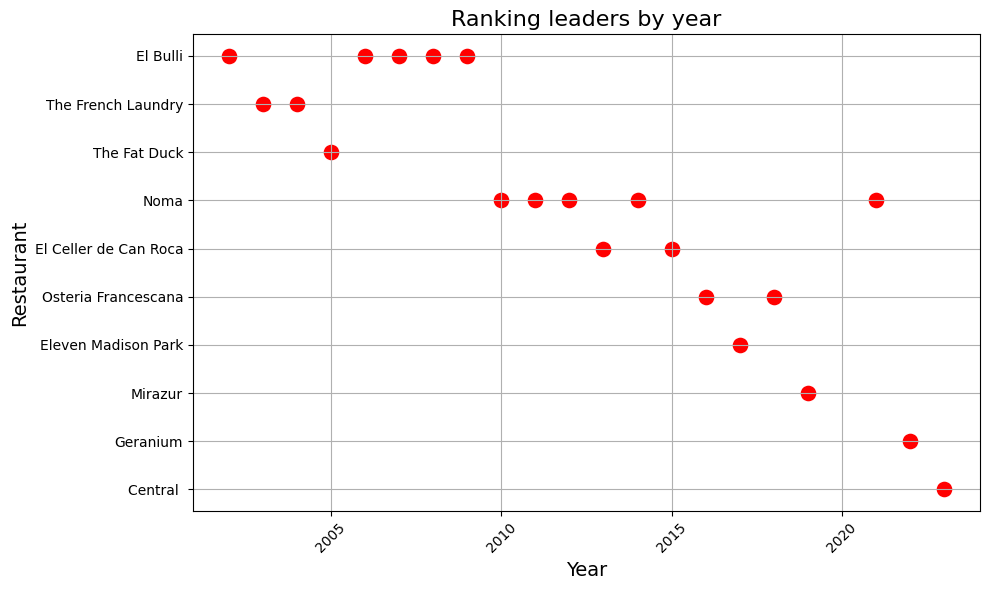

In [2]:
leaders = data[data['rank'] == 1]
plt.figure(figsize=(10, 6))

sns.scatterplot(x='year', y='restaurant', data=leaders, s=150, color="red")

plt.title('Ranking leaders by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* **Description**: Visualization using a scatterplot that displays the top ranked restaurants in different years. Each dot represents a restaurant and the X axis indicates the year.
* **Purpose**: To show how the restaurant ranking leaders have changed over time and to identify trends or recurring restaurants in the top.
* **Analysis**: The graph provides insight into the stability or variability of the leaderboards over the study period. 

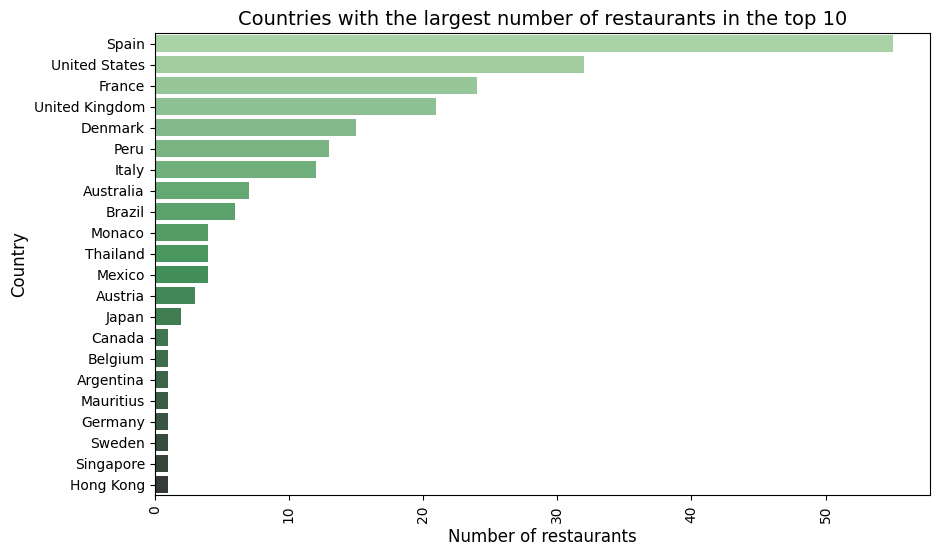

In [3]:
top_10 = data[data['rank'] <= 10]

top_10_countries = top_10['country'].value_counts().reset_index()
top_10_countries.columns = ['country', 'count']


plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='country', data=top_10_countries, palette='Greens_d')
plt.title('Countries with the largest number of restaurants in the top 10', fontsize=14)
plt.xlabel('Number of restaurants', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

* **Description**: Horizontal barplot (seaborn.barplot) showing the number of restaurants from each country that made the top 10 ranking. The Y axis shows the countries and the X axis shows the number of restaurants.
* **Purpose**: To determine which countries are most often represented in the top 10 of the world ranking, which may indicate a high culinary culture or a developed gastronomic industry.

* **Analysis**:
1. *Leaders*: Spain ranks first with the highest number of restaurants in the top 10, emphasizing its strong position in the global gastronomy industry. The US and France also stand out significantly, occupying the second and third positions respectively.
1. *European dominance*: It can be seen that most of the countries on this list are located in Europe, indicating the influence of European cuisine on the global gastronomic scene.
1. *Asian and South American countries*: Although the representation of countries such as Thailand, Japan, Brazil and Mexico is relatively lower, their presence in the top 10 shows the growing popularity of Asian and South American cuisines.

In [4]:
map_world = folium.Map(location=[20, 0], zoom_start=2)

for index, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['restaurant']} ({row['country']})",
    ).add_to(map_world)

map_world.save("restaurants_map.html")

map_world

**Interactive restaurant map**

* **Description**: An interactive map created with folium that shows the location of the best restaurants in the world. Markers on the map represent the restaurants and when hovering over them, the name and country are displayed.
* **Purpose**: Visualize the geographical distribution of the best restaurants, which makes the analysis more visual and allows the user to explore where the culinary hubs are concentrated.
* **Analysis**: The map visualizes global culinary trends and helps identify regions with a high concentration of high-end restaurants. Useful for identifying the world's gastronomic capitals.

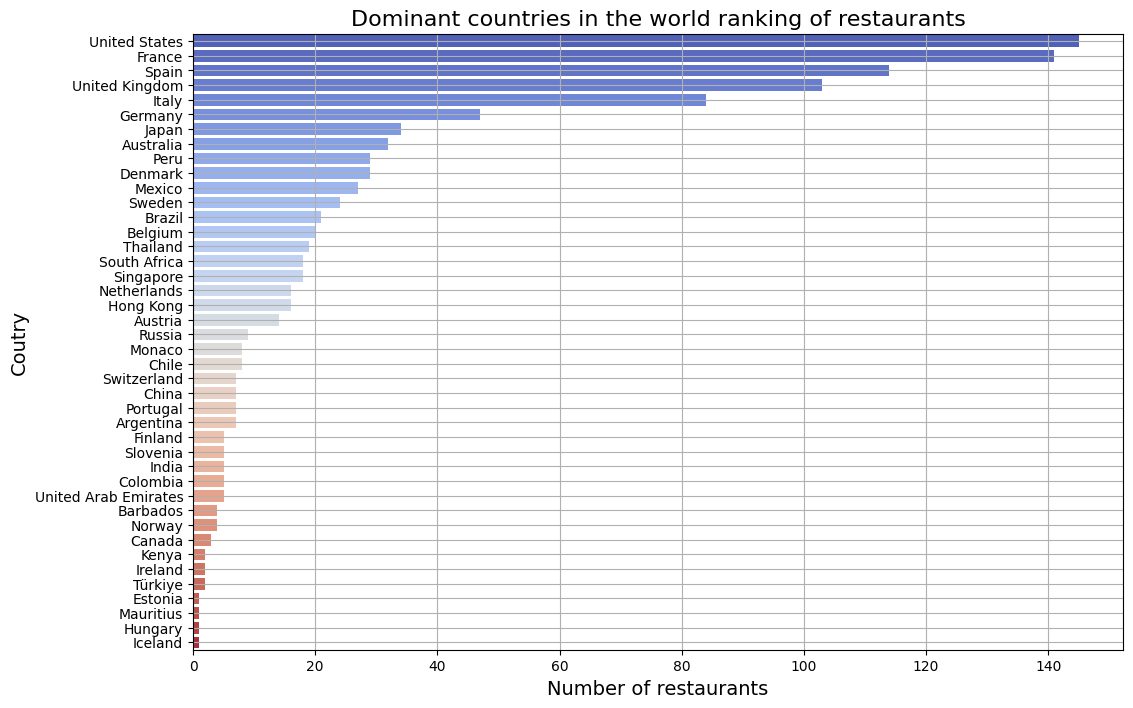

In [5]:
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='country', data=country_counts, palette='coolwarm')
plt.title('Dominant countries in the world ranking of restaurants', fontsize=16)
plt.xlabel('Number of restaurants', fontsize=14)
plt.ylabel('Coutry', fontsize=14)
plt.grid(True)
plt.show()

* **Description**: This graph shows the distribution of countries by the number of restaurants ranked in the world ranking of best establishments. It is a horizontal barplot, where the Y axis shows the countries and the X axis shows the number of restaurants represented in the ranking. The coolwarm color palette adds visual appeal to the graphic, helping to distinguish countries more easily.
* **Objective**: The purpose of this visualization is to show which countries are most represented in the world restaurant rankings, which helps to identify leaders in the haute cuisine and gastronomy industry. This helps to highlight the countries with the most developed culinary culture and extensive restaurant business.
* **Analysis**:

1. *Ranking Leaders*: The U.S., France and Spain stand out as the countries with the highest number of restaurants in the global ranking, highlighting their status as global gastronomic centers.
1. *European dominance*: Europe as a whole has significant representation in the ranking, including countries such as the UK, Italy, Germany and Sweden. This confirms the high standards and long history of gastronomic tradition in Europe.
1. *Regional diversity*: In addition to Europe and North America, restaurants from South America (Peru, Brazil, Argentina), Asia (Japan, China, Thailand, Singapore) and other regions are represented in the ranking. This is a testament to the growing popularity and acceptance of cuisine from around the world.
1. *Rare representatives*: Countries such as Iceland, Estonia and Kenya each have just one restaurant in the ranking, highlighting their limited but still significant presence in the global culinary scene.

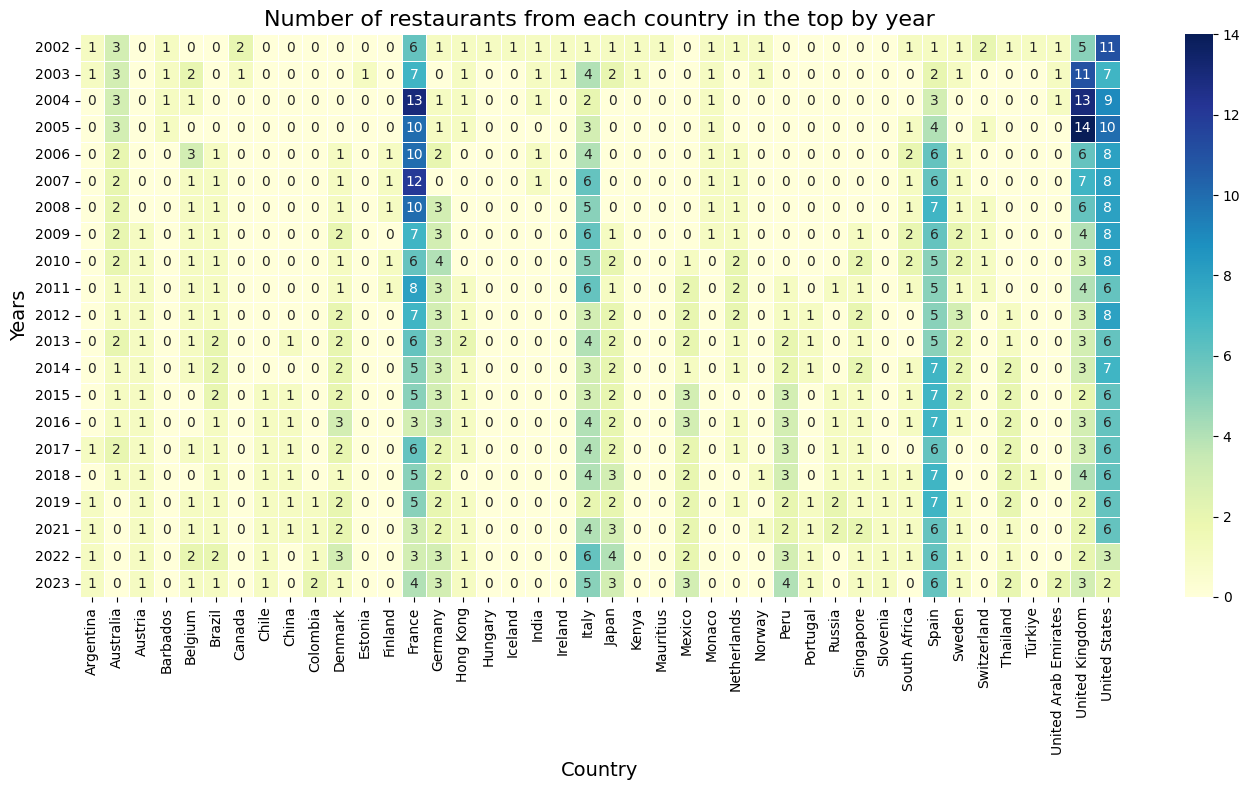

In [6]:
country_year_counts = data.groupby(['year', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(country_year_counts, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title('Number of restaurants from each country in the top by year', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Years', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* **Description**: This graph is a heat map showing the number of restaurants from each country in the top of the world rankings, broken down by year. The years (2002 through 2023) are plotted on the Y-axis and the countries are plotted on the X-axis. The cells of the map are colored according to the number of restaurants: the darker the color, the more restaurants from a given country were in the ranking in a given year.
* **Objective**: The purpose of this visualization is to show how the presence of restaurants from different countries in the global ranking has changed over the years. This allows you to identify long-term trends, the rise in popularity of certain cuisines or countries, and to determine which countries have the most stable presence in the top.
* **Analysis**:

1. *Stable leaders*: Spain and the United States have dark cells in most years, indicating their stable and strong presence in the global restaurant rankings.
2. *Surges in popularity*: Some countries, such as France and the UK, show a significant number of restaurants in certain years, which may be due to cultural or economic changes affecting the restaurant industry.
3. *New players*: New countries such as Colombia and South Africa have been emerging in recent years, indicating a growing acceptance of gastronomy in these regions.
4. *Long-term changes*: Over time, it is possible to see how the popularity of restaurants from different countries increases or decreases. For example, one can see periods of increasing or decreasing numbers of restaurants for certain countries, reflecting global changes in culinary preferences.

This heat map visualizes global trends in the global restaurant industry and helps you understand which countries have a strong reputation in the world of haute cuisine.


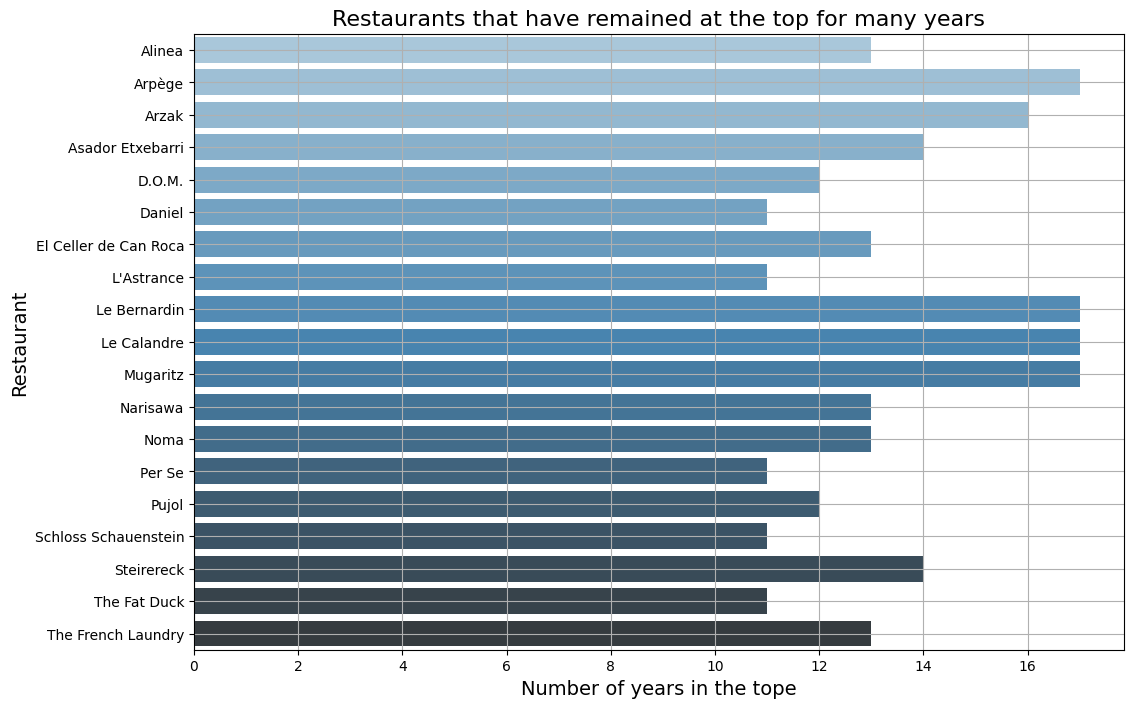

In [7]:
restaurant_years = data.groupby('restaurant')['year'].nunique().reset_index()
restaurant_years.columns = ['restaurant', 'years_in_top']

long_lasting_restaurants = restaurant_years[restaurant_years['years_in_top'] > 10]

plt.figure(figsize=(12, 8))
sns.barplot(x='years_in_top', y='restaurant', data=long_lasting_restaurants, palette='Blues_d')
plt.title('Restaurants that have remained at the top for many years', fontsize=16)
plt.xlabel('Number of years in the topе', fontsize=14)
plt.ylabel('Restaurant', fontsize=14)
plt.grid(True)
plt.show()

* **Description**: This graph is a horizontal barplot showing the restaurants that have remained at the top of the world rankings over the years. The Y axis shows the names of the restaurants, and the X axis shows the number of years each restaurant has maintained a high position in the rankings. The Blues_d palette is used as a visualization to highlight the length of time in the rankings.
* **Objective**: The purpose of this visualization is to highlight restaurants that have remained leaders in the global restaurant industry over the years. This helps to identify which establishments have a strong reputation and consistent quality, which can be indicative of high culinary value and outstanding service.
* **Analysis**:

1. *Long-term leaders*: Restaurants such as Arpège, Le Bernardin, Le Calandre and Mugaritz have the highest number of years at the top, indicating their stability and ability to maintain a high position for more than 15 years.
2. *Broad distribution*: Some restaurants, such as Noma and El Celler de Can Roca, also show a significant presence, highlighting their status as recognized culinary icons.
3. *Diversity of cuisines*: The restaurants on the chart represent different cuisines and countries, reflecting the global nature of haute cuisine and recognition in different parts of the world.

The graph shows which restaurants have an unrivaled reputation and stability in the restaurant industry, offering insight into how establishments maintain their appeal and hold their position over the years.
